In [1]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
import Tools as tl
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell
from ase.build import sort
from ase.geometry import get_layers


from ase.visualize import view

## Creo celda ZrO2 2x2 y un sitio tipo 'hollow1'

In [2]:
zro2 = read_vasp('Structure/POSCAR')

ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)

ZrO2001Oterm_2x2_unsorted = [make_supercell(thisurface,[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for thisurface in ZrO2001Oterm]
ZrO2001Oterm_2x2 = [sort(thissurface.copy()) for thissurface in ZrO2001Oterm_2x2_unsorted]

layer, height = get_layers(ZrO2001Oterm_2x2[0], (0,0,1), tolerance=0.7)
h_sitios = ZrO2001Oterm_2x2[0].positions.max(axis=0)[-1]
hollow1 = ZrO2001Oterm_2x2[0].positions[layer == 13].mean(axis=0)[:2]
hollow1 = np.append(hollow1, h_sitios)
ZrO2001Oterm_2x2[0].info = {'adatom': {'top': {'hollow1': hollow1}}}
onhollow1 = tl.make_adstruc(ZrO2001Oterm_2x2[0], 'hollow1', thesite='hollow1', theface='top',)

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


## Creo celda Zr 1x1, roto, hago simetria, agrego sitio tipo "top"

In [51]:
zrhcp = bulk('Zr', crystalstructure='hcp')
zrortho = bulk('Zr', crystalstructure='hcp', orthorhombic=True)

Zr0001 = surfaces_with_termination(zrortho, (0, 0, 1), 5, vacuum=10, termination='Zr')[0]

rotated = []
RotAdStruc = []
rotatedsymmetric = []
title = []
dang = 15  # saltos entre los ángulos siguientes
planos = ['0001']
surfaces = [Zr0001]
cantplanos = 1
angles = np.linspace(0,45,4)
newcell = ZrO2001Oterm_2x2[0].cell.array
for i, (plano, surface) in enumerate(zip(planos, surfaces)): # in range(0, len(planos)):
    rotatedsymmetric = tl.make_symmetric(surface, natoms=2)
    print(newcell[:2,:])
    print(surface.cell.array[-1,:])
    rotatedsymmetric.set_cell(
        np.vstack((newcell[:2,:], surface.cell.array[-1,:])),
        scale_atoms=True)
    for ang in angles: # in range(0, 46, dang):
        rotated.append(sort(rotatedsymmetric.copy()))
        rotated[-1].center()
        rotated[-1].rotate(ang, 'z', center="com", rotate_cell=False)
        tl.get_adsite(rotated[-1], site='top', face='bottom')   # bottom para metal
        print(rotated[-1].info)
        RotAdStruc.append(tl.make_adstruc(rotated[-1], 'RotBotTop', theface='bottom', thesite='top'))
        name = f'{ang}_{plano}_rotated.vasp'
        rotated[-1].write(name, direct=True, sort=True)
        title.append(f'Zr rotado {ang} º')

[[7.26839798 0.         0.        ]
 [0.         7.26839798 0.        ]]
[ 0.        0.       43.154255]
{'adatom': {'bottom': {'top': array([ 1.8170995 ,  1.21139966, 11.2863475 ])}}}
{'adatom': {'bottom': {'top': array([ 2.48866375,  0.8213614 , 11.2863475 ])}}}
{'adatom': {'bottom': {'top': array([ 3.23829434,  0.61842699, 11.2863475 ])}}}
{'adatom': {'bottom': {'top': array([ 4.01490518,  0.61642607, 11.2863475 ])}}}


Text(0.5, 1.0, 'ZrO2')

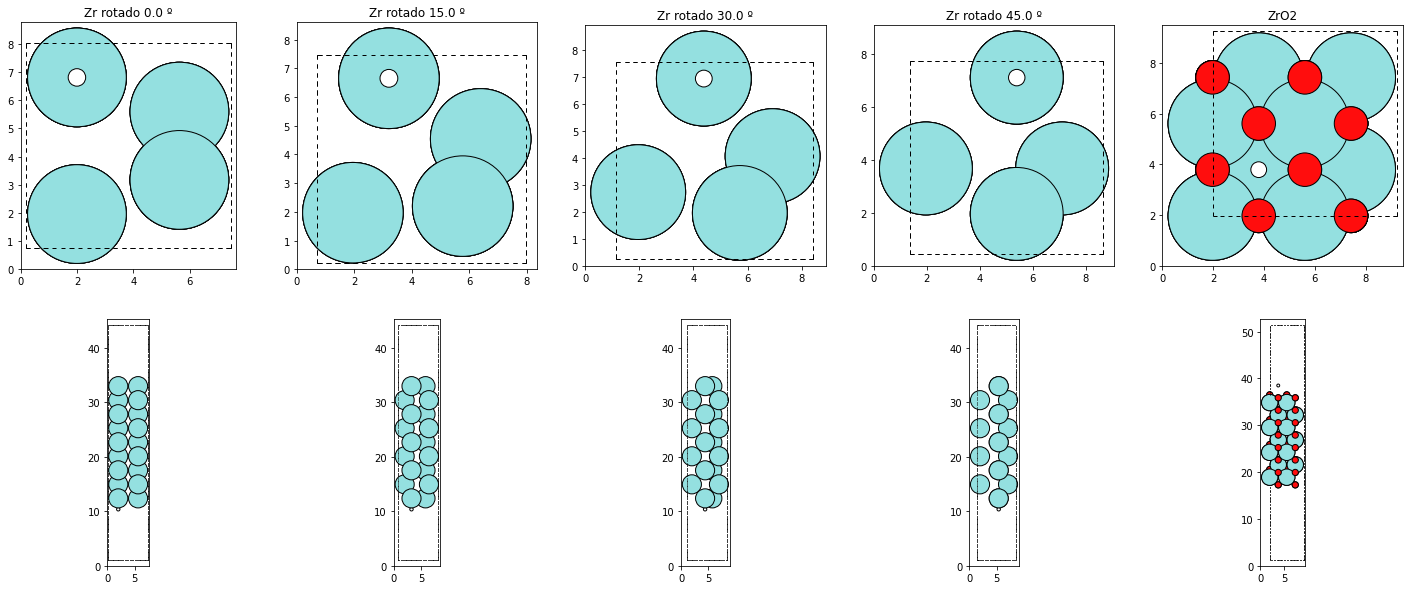

In [52]:
fig, ax = plt.subplots(2, len(RotAdStruc)+1)

for i , (theroted, thetitle) in enumerate(zip(RotAdStruc, title)): #range(len(RotAdStruc)):
    plot_atoms(theroted, ax=ax[0,i], rotation='-180x')
    plot_atoms(theroted, ax=ax[1,i], rotation='-90x')
    ax[0,i].set_title(thetitle)

plot_atoms(onhollow1, ax=ax[0,-1])
plot_atoms(onhollow1, ax=ax[1,-1], rotation='-90x')
ax[0,-1].set_title('ZrO2')

In [53]:
Zr0001.cell #longitudes de vectores de red

Cell([3.23, 5.594524108447473, 43.154255000000006])

In [54]:
NewCell = ZrO2001Oterm_2x2[0].cell.copy()

In [55]:
Stack1 = tl.stack(ZrO2001Oterm_2x2[0],rotated[-1],'hollow1','top',2,cell=NewCell)


[-2.19780568  1.20067342 25.93458156]


In [56]:
Stack1.write('Stack1.vasp',sort=True, wrap=True, direct=True )

In [57]:
Stack1.cell

Cell([7.268397980708341, 7.268397980708341, 43.78665494811325])

In [58]:
rotated[0].info

{'adatom': {'bottom': {'top': array([ 1.8170995 ,  1.21139966, 11.2863475 ])}}}

In [59]:
rotated[0].positions.min(axis=0)

array([ 1.8170995 ,  1.21139966, 11.2863475 ])

In [60]:
ZrO2001Oterm_2x2[0].info

{'adatom': {'top': {'hollow1': array([ 1.8170995 ,  1.8170995 , 35.22092906])}}}

In [61]:
ZrO2001Oterm_2x2[0].positions.max(axis=0)

array([ 5.45129849,  5.45129849, 35.22092906])

In [62]:
Stack1.wrap(pbc=True)

In [63]:
view(Stack1)

<Popen: returncode: None args: ['/data/Anaconda/ifermi_pymatgen/bin/python',...>

In [32]:
tl.get_slab_height(rotated[0])

23.951869049303514

In [17]:
view(rotated[-1])

<Popen: returncode: None args: ['/data/Anaconda/ifermi_pymatgen/bin/python',...>